# Problema de negócio:

##### Usar dados históricos para prever salário de alguém, com base no tempo dedicado aos estudos em horas por dias

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
# Carregando dataset
dataFrame = pd.read_csv('dataset.csv')

In [42]:
dataFrame.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [43]:
dataFrame.shape

(500, 2)

In [44]:
dataFrame.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [45]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Análise exploratória

Variável alvo => Salário

In [46]:
dataFrame.corr() # Verifica correlação entre as varíaveis

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [47]:
dataFrame.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [48]:
# Resumo da variável preditora
dataFrame['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

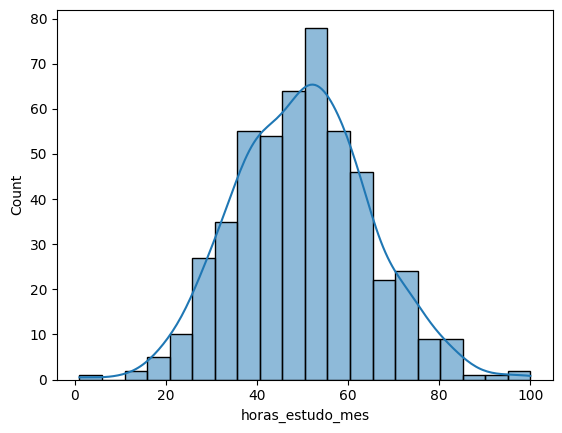

In [49]:
# histograma da variável preditora
sns.histplot(data = dataFrame, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados

In [50]:
x = np.array(dataFrame['horas_estudo_mes'])

In [51]:
type(x)

numpy.ndarray

In [52]:
# Ajusta o shape de X
x = x.reshape(-1,1)

In [53]:
# Prepara a variável alvo
y = dataFrame['salario']

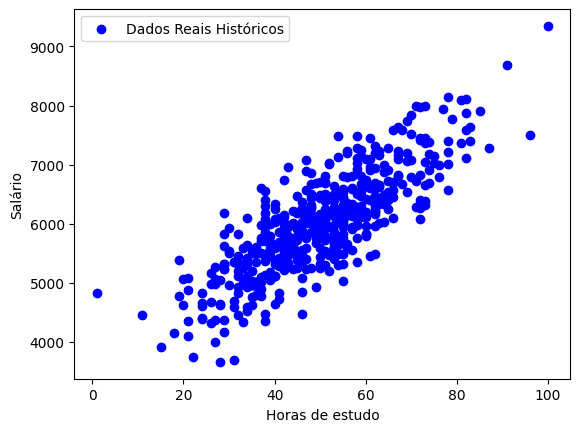

In [54]:
# Gráfico de dispersão entre x e y

plt.scatter(x,y,color = 'blue', label = 'Dados Reais Históricos')
plt.xlabel('Horas de estudo')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [55]:
# Dividir os dados em treinamento e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [56]:
x_treino.shape

(400, 1)

In [57]:
x_teste.shape

(100, 1)

In [58]:
y_treino.shape

(400,)

In [59]:
y_teste.shape

(100,)

# Modelagem Preditiva 

In [60]:
# Criar modelo de regressão linear simples
modelo = LinearRegression()

In [61]:
# Treinar o modelo 
modelo.fit(x_treino, y_treino)

LinearRegression()

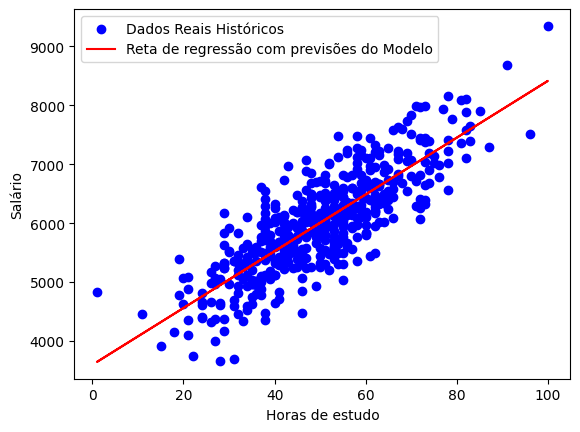

In [64]:
# Visualiza a reta de regressão nilear (previsões) e os dados reais usados no treinamento
plt.scatter(x,y, color = "blue", label = 'Dados Reais Históricos')
plt.plot(x, modelo.predict(x), color ="red", label = 'Reta de regressão com previsões do Modelo')
plt.xlabel("Horas de estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [68]:
# Avaliar o modelo nos dados de teste
score= modelo.score(x_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [70]:
# Intercepto - parametro W0
modelo.intercept_

3596.7837243727527

In [72]:
# Slope - parametro W1
modelo.coef_

array([48.18185277])